In [1]:
function codetobasis(a::Int64,L::Int64,base=4) #convert a state code a to basis, e.g. 1=0000001
    basis=zeros(Int64,L);
    temp=a;
    for i=1:L
        basis[i]=rem(temp,base);
        temp=div(temp,base);
    end
    return basis;
end

codetobasis (generic function with 2 methods)

In [2]:
using SparseArrays
num2basis(a::Int64,L::Int64,base=4)=codetobasis(a,L,base)

num2basis (generic function with 2 methods)

In [3]:
#basis to number converter
function basistocode(basis::Array{Int64},base=4)
    temp=BigInt(0);
    for i=1:length(basis)
        temp+=basis[i]*big(base)^(i-1);
    end
    return temp;
end

basistocode (generic function with 2 methods)

In [4]:
basis2num(basis::Array{Int64},base=4)=basistocode(basis,base)

basis2num (generic function with 2 methods)

In [5]:
function Pauli_Algebra(x::Int64, y::Int64)
           if x == 0 && y == 0 || x == 1 && y == 1 || x == 2 && y == 2 || x == 3 && y == 3
               c, w = 1, 0
           elseif x == 2 && y == 3
               c, w = 1im, 1
           elseif x == 3 && y == 1
               c, w = 1im, 2
           elseif x == 1 && y == 2
               c, w = 1im, 3
           elseif x == 3 && y == 2 
               c, w = -1im, 1
           elseif x == 1 && y == 3 
               c, w = -1im, 2
           elseif x == 2 && y == 1 
               c, w = -1im, 3
           elseif x == 0 && y == 1 || x == 1 && y == 0 
               c, w = 1, 1
           elseif x == 0 && y == 2 || x == 2 && y == 0 
               c, w = 1, 2
           elseif x == 0 && y == 3 || x == 3 && y == 0 
               c, w = 1, 3
           end
            return c, w
       end

Pauli_Algebra (generic function with 1 method)

In [6]:
PauliAlg(x::Int64, y::Int64) = Pauli_Algebra(x, y)

PauliAlg (generic function with 1 method)

In [7]:
function Initial_Operator(c::Complex{Float64},a::Int64,L::Int64)
    z = convert(Array{Int64},zeros(L))
    z[convert(Int64,ceil(L/2))] = a
     return (c,z)
end

Initial_Operator (generic function with 1 method)

In [8]:
function IoP(a,L)
    z = convert(Array{Int64},zeros(L))
    z[convert(Int64,ceil(L/2))] = a
     return z
end

IoP (generic function with 1 method)

In [9]:
InitialOp(c,a::Int64,L::Int64) = Initial_Operator(c,a,L)

InitialOp (generic function with 1 method)

In [10]:
function Pauli_Commutator(x::Int64, y::Int64)
           if  x == 1 && y == 1 || x == 2 && y == 2 || x == 3 && y == 3
               return 0 ,0
           elseif x == 0 || y == 0
               return 0 ,0
           elseif x == 1 && y == 2 
               return  2im, 3
           elseif x == 1 && y == 3 
               return  -2im, 2
           elseif x == 2 && y == 1 
               return  -2im, 3
           elseif x == 2 && y == 3 
               return  2im, 1
           elseif x == 3 && y == 1 
               return  2im, 2
           elseif x == 3 && y == 2 
               return  -2im, 1
           end
            return c, w
       end

Pauli_Commutator (generic function with 1 method)

In [11]:
PauliComm(x::Int64, y::Int64) = Pauli_Commutator(x, y)

PauliComm (generic function with 1 method)

In [12]:
function Pauli_Algebra2(x::Int64, y::Int64) #This product is blind to coefficients and signs
           if  x == 1 && y == 1 || x == 2 && y == 2 || x == 3 && y == 3
               return 0
           elseif x == 0 && y == 0
               return 0
           elseif x == 0 && y != 0
                return y
           elseif x != 0 && y == 0
                return x
           elseif x == 1 && y == 2 
               return  3
           elseif x == 1 && y == 3 
               return  2
           elseif x == 2 && y == 1 
               return  3
           elseif x == 2 && y == 3 
               return  1
           elseif x == 3 && y == 1 
               return  2
           elseif x == 3 && y == 2 
               return  1
           end
            return w
       end

Pauli_Algebra2 (generic function with 1 method)

In [13]:
PC2(x::Int64, y::Int64) = Pauli_Algebra2(x, y)

PC2 (generic function with 1 method)

In [14]:
function Commutator(A::Array{Int64,1},B::Array{Int64,1},L::Int64) #Commutation of Pauli (Basis)
    cm = convert(Array{Int64},zeros(L))
    zl = 1
    zr = 1
    for i = 1:L
        cm[i] += PauliAlg(A[i],B[i])[2] 
    end
    for i = 1:L
        zl = zl * PauliAlg(A[i],B[i])[1] 
        zr = zr * PauliAlg(B[i],A[i])[1]
    end 
    z = zl - zr 
    if z == 0
        return (convert(Complex{Float64},0),cm)
    else
        return (convert(Complex{Float64},z), cm)
    end
end

Commutator (generic function with 1 method)

In [15]:
Comm(A::Array{Int64,1},B::Array{Int64,1},L::Int64)= Commutator(A,B,L)

Comm (generic function with 1 method)

In [16]:
function Interaction_Hamiltonian(j::Int64,A::Int64,B::Int64,L::Int64)
    h = convert(Array{Int64},zeros(L))
    h[j] = A
    h[j+1] = B
    return h
end

Interaction_Hamiltonian (generic function with 1 method)

In [17]:
function LocalField_Hamiltonian(j::Int64,A::Int64,L::Int64)
    h = convert(Array{Int64},zeros(L))
    h[j] = A
    return h
end

LocalField_Hamiltonian (generic function with 1 method)

In [18]:
IntHam(j::Int64,A::Int64,B::Int64,L::Int64) = Interaction_Hamiltonian(j,A,B,L)

IntHam (generic function with 1 method)

In [19]:
#I will define as code the map from paulis to a number by means of the power of 4 sum. 
#I will define as index the corresponding Julia entry for the array In this very trivial case that means
# Index = code + 1

In [20]:
function Index_to_Pauli(a::Int64,L::Int64) #Thisfunctionsendscoeffentrytotheassocpaulistring a>=1
    if a >= 1
        z = a-1
        p = codetobasis(z,L)
    else
        println("Error!, index starts at 1 ")
    end
    
    return p
end

Index_to_Pauli (generic function with 1 method)

In [21]:
Index2Pauli(a::Int64,L::Int64) = Index_to_Pauli(a,L)

Index2Pauli (generic function with 1 method)

In [22]:
function Pauli_to_Index(A::Array{Int64})
    z = BigInt(basis2num(A)) + 1
    return z
end

Pauli_to_Index (generic function with 1 method)

In [23]:
Pauli2Index(A::Array{Int64}) = Pauli_to_Index(A)

Pauli2Index (generic function with 1 method)

In [24]:
#Now I want to make a function that I give it a coefficient and a Pauli and in returns
#a coefficient and a index

In [25]:
function Coef_and_Pauli_to_Index(V::Tuple{Complex{Float64},Array{Int64,1}},L::Int64)
    cf = V[1]
    index = Pauli2Index(V[2])
    return (cf,index)
end 

Coef_and_Pauli_to_Index (generic function with 1 method)

In [26]:
CnP2I(V::Tuple{Complex{Float64},Array{Int64,1}},L::Int64) = Coef_and_Pauli_to_Index(V,L)

CnP2I (generic function with 1 method)

In [27]:
#Reminder: Index to pauli needs L.  Pauli to Index doesnt

In [28]:
function Coef_and_Index_to_Pauli(a::Complex{Float64},b::Int64,L::Int64)
    c = a
    z = Index2Pauli(b,L)
    
    return (c,z)
end

Coef_and_Index_to_Pauli (generic function with 1 method)

In [29]:
CnI2P(a::Complex{Int64},b::Int64,L::Int64) = Coef_and_Index_to_Pauli(a,b,L)

CnI2P (generic function with 1 method)

In [30]:
function Hamiltonian(i::Int64,c,A::Int64,B::Int64,L::Int64)
    coef = c
    h = convert(Array{Int64},zeros(L))
    h[i] = A
    h[i+1] = B
    
    return (coef, h)
end  

Hamiltonian (generic function with 1 method)

In [31]:
function HamP(c::Int64,A::Int64,B::Int64)
    
    return (c,A,B)
end

HamP (generic function with 1 method)

In [32]:
function Liouvillian(H::Tuple{Int64,Int64,Int64},Op::Tuple{Complex{Float64},Array{Int64,1}},L::Int64)
    coefvec = convert(Array{Complex{Float64}},ones(L-1))
    v = [Vector{Int64}() for i in 1:L-1]
    for i=1:L-1
        v[i] = Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[2]
    end
    for i=1:L-1
        coefvec[i] = Hamiltonian(i,H[1],H[2],H[3],L)[1] * Op[1] * Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[1]
    end
    
    return (coefvec, v)
end

Liouvillian (generic function with 1 method)

In [33]:
#Important:Some Pauli strings will show up that are associated to a 0 coefficient.

In [34]:
function LiouvillianIndexForm(H::Tuple{Int64,Int64,Int64},Op::Tuple{Complex{Float64},Array{Int64,1}},L::Int64)
    coefvec = convert(Array{Complex{Float64}},ones(L-1))
    v = [Vector{Int64}() for i in 1:L-1]
    VI = convert(Array{Int64},zeros(L-1))
    for i=1:L-1
        v[i] = Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[2]
    end
    for i=1:L-1
        coefvec[i] = Hamiltonian(i,H[1],H[2],H[3],L)[1] * Op[1] * Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[1]
    end
    for i=1:L-1
        VI[i] = Pauli2Index(v[i])
    end
        
    return (coefvec,VI)
end

LiouvillianIndexForm (generic function with 1 method)

In [35]:
function LiouvillianIndexForm4Lvector(H::Tuple{Int64,Int64,Int64},Op::Tuple{Complex{Float64},Array{Int64,1}},L::Int64)
    coefvec = convert(Array{Complex{Float64}},ones(L-1))
    v = [Vector{Int64}() for i in 1:L-1]
    VI = convert(Array{Int64},zeros(L-1))
    FV = convert(Array{Complex{Float64}},zeros(4^L))
    for i=1:L-1
        v[i] = Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[2]
    end
    for i=1:L-1
        coefvec[i] = Hamiltonian(i,H[1],H[2],H[3],L)[1] * Op[1] * Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[1]
    end
    for i=1:L-1
        VI[i] = Pauli2Index(v[i])
    end
    for i=1:L-1
        FV[VI[i]] = coefvec[i]
    end
 
    
    return sparse(FV)
            
end

LiouvillianIndexForm4Lvector (generic function with 1 method)

In [36]:
function CoefandPauli_to_IndexVector(A::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},L::Int64)
    k = convert(Array{BigInt,1},zeros(length(A[1]))) 
    for i = 1:length(A[1])
        k[i] = Pauli2Index(A[2][i])
    end
    return sparsevec(k,A[1],4^L,+)
end

CoefandPauli_to_IndexVector (generic function with 1 method)

In [37]:
#Here we aim to write a function that takes a 4^L sized vector which is actually our index vector
#And spits out coeficients and associated Pauli string IndexVector_to_CoefandPauli
function IndexVector_to_CoefandPauli(V::SparseVector{Complex{Float64},Int64},L::Int64)
    k = findnz(V)[2]
    w = [Vector{Int64}() for i in 1:nnz(V)]

    for i =1:nnz(V)
        w[i] = Index2Pauli(findnz(V)[1][i],L)
    end
    return (k,w)
end

IndexVector_to_CoefandPauli (generic function with 1 method)

In [38]:
function LiouvillianE(H::Tuple{Int64,Int64,Int64},Op::Tuple{Complex{Float64},Array{Int64,1}},L::Int64)
    coefvec = convert(Array{Complex{Float64}},ones(L-1))
    v = [Vector{Int64}() for i in 1:L-1]
    VI = convert(Array{Int64},zeros(L-1))
    FV = convert(Array{Complex{Float64}},zeros(4^L))
    for i=1:L-1
        v[i] = Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[2]
    end
    for i=1:L-1
        coefvec[i] = Hamiltonian(i,H[1],H[2],H[3],L)[1] * Op[1] * Comm(Hamiltonian(i,H[1],H[2],H[3],L)[2],Op[2],L)[1]
    end
    for i=1:L-1
        VI[i] = Pauli2Index(v[i])
    end
    for i=1:L-1
        FV[VI[i]] = coefvec[i]
    end
 
    return IndexVector_to_CoefandPauli(sparse(FV),L)
            
end
#This function is the same as Liouvillian but doesn't give ugly 0 coefficient terms!

LiouvillianE (generic function with 1 method)

In [39]:
function TupleCommu(A::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},B::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},L::Int64)
    k = Complex{Float64}[]
    w = [Vector{Int64}() for i in 1:length(A[1])*length(B[1])]
    x = 0
    for i =1:length(A[1])
        for j =1:length(B[1])
            if A[1][i] * B[1][j] * Comm(A[2][i],B[2][j],L)[1] != 0
                x+=1
                append!( k, A[1][i] * B[1][j] * Comm(A[2][i],B[2][j],L)[1] )
                w[x] = Comm(A[2][i],B[2][j],L)[2]
            end
        end
    end
    return CoefandPauli_to_IndexVector((k,w[1:length(k)]),TT[2])
end

TupleCommu (generic function with 1 method)

In [40]:
#function TupleCommu(A::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},B::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},L::Int64)
 #   k = convert(Array{Complex{Float64}},ones(length(A[1])*length(B[1])))
  #  w = [Vector{Int64}() for i in 1:length(A[1])*length(B[1])]
   # x = 0
    #for i =1:length(A[1])
     #   for j =1:length(B[1])
      #      x+=1
       #     k[x] = A[1][i] * B[1][j] * Comm(A[2][i],B[2][j],L)[1]
        #    w[x] = Comm(A[2][i],B[2][j],L)[2]
        #end
    #end
    #return (k,w)
    #thisone original return: return CoefandPauli_to_IndexVector((k,w),L)
#end

In [41]:
#Now before writing the Lanczos we need the Liouvillian for the XXX Hamiltonian
#Notice this Liouvillian is different from previous since it must me able 
#to receive a N-TuplePauli 
#Once we have this we can easily write the Lanczos algorithm for n-iterations

In [42]:
using Distributions

In [43]:
#Function to create a disorder vector of length L with random variables in the [-h,h] box

In [44]:
function disorderField(h,L::Int64)
    V = zeros(L)
    for i=1:L
        V[i] = rand(Uniform(-h, h))
    end
    return convert(Array{Complex{Float64}},V)
end

disorderField (generic function with 1 method)

In [45]:
function HamiltonInt(C::Array{Complex{Float64}},P::Int64,L::Int64)
    w = [Vector{Int64}() for i in 1:L-1]
    for i=1:L-1
        w[i] = Interaction_Hamiltonian(i,P,P,L)
    end
    return (C,w)
end

HamiltonInt (generic function with 1 method)

In [184]:
function HamiltonFloat(C::Array{Complex{Float64},1},P::Int64,L::Int64)
    w = [Vector{Int64}() for i in 1:L]
    for i=1:L
        w[i] = LocalField_Hamiltonian(i,P,L)
    end
    return (C,w)
end

HamiltonFloat (generic function with 2 methods)

In [47]:
function Liouville2(H::Tuple{Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}}},O::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},L::Int64)
    W = TupleCommu(H[1],O,L) + TupleCommu(H[2],O,L) + TupleCommu(H[3],O,L) 

    return W
end

Liouville2 (generic function with 1 method)

In [48]:
function Liouville(H::NTuple{4,Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}}},O::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},L::Int64)
    W = TupleCommu(H[1],O,L) + TupleCommu(H[2],O,L) + TupleCommu(H[3],O,L) - TupleCommu(H[4],O,L)

    return W
end

Liouville (generic function with 1 method)

In [49]:
using LinearAlgebra

In [201]:
function DisorderMatrix(h_dis,L,m)
    A = Complex.(zeros(L,m))
    for i = 1:m
        A[:,i] = disorderField(h_dis,L)
    end
    return A
end

DisorderMatrix (generic function with 2 methods)

In [202]:
DisorderMatrix(12,10,5)

10×5 Array{Complex{Float64},2}:
 -6.16381+0.0im  -2.34731+0.0im  …    2.6376+0.0im  -4.88753+0.0im
 -5.38882+0.0im   1.74386+0.0im      4.99162+0.0im  -2.14892+0.0im
  7.69218+0.0im    2.8811+0.0im     -7.35007+0.0im  -7.38761+0.0im
 -9.58959+0.0im  -5.24401+0.0im     -8.37444+0.0im   6.36394+0.0im
  11.8692+0.0im   4.94122+0.0im     -1.20038+0.0im   -4.0335+0.0im
 -5.02774+0.0im  -4.73679+0.0im  …  0.960661+0.0im  -3.26596+0.0im
 -5.85263+0.0im   4.91254+0.0im      1.65719+0.0im  -4.00009+0.0im
 -5.18658+0.0im    11.273+0.0im     -5.34343+0.0im  -1.72527+0.0im
  11.8706+0.0im  -5.09477+0.0im     -7.51711+0.0im  -1.47073+0.0im
  -9.4534+0.0im  -11.8412+0.0im     -1.41343+0.0im   -11.915+0.0im

In [87]:
h = 12

12

In [99]:
LT = 19

19

In [100]:
N_iter = convert(Int64,(LT - 1)/2) + 1

10

In [101]:
Oj = (Complex{Float64}[1 + 0im], [IoP(1,LT)]);

In [102]:
H_X = HamiltonInt(convert(Array{Complex{Float64}},ones(LT-1)),1,LT);

In [103]:
H_Y = HamiltonInt(convert(Array{Complex{Float64}},ones(LT-1)),2,LT);

In [104]:
H_Z = HamiltonInt(convert(Array{Complex{Float64}},ones(LT-1)),3,LT);

In [105]:
TT = (N_iter,LT);

In [106]:
AH = (H_X,H_Y,H_Z);

In [107]:
H_F = HamiltonFloat(disorderField(h,LT),3,LT);

In [108]:
FH = (H_X,H_Y,H_Z,H_F);

In [109]:
HE=HamiltonInt(convert(Array{Complex{Float64}},zeros(LT-1)),3,LT);

In [110]:
function Lanczos3(H::Tuple{Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}}},O::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},V::Tuple{Int64,Int64})
    bn  = convert(Array{Float64},zeros(V[1]))
    On = [(Complex{Float64}[], Array{Int64,1}[]) for i in 1:V[1]]
    An = [sparse(convert(Array{Complex{Float64}},zeros(4^5))) for i in 1:V[1]]
    
    
    On[1] = O
    
    An[1] = Liouville2(H,On[1],V[2])
    bn[2] = sqrt(dot(An[1],An[1]))
    On[2] = IndexVector_to_CoefandPauli((1/(bn[2])) * An[1],V[2])
    
    for i=2:V[1]-1
        An[i] = Liouville2(H,On[i],V[2]) - bn[i] * CoefandPauli_to_IndexVector(On[i-1],V[2])
        bn[i+1] = sqrt(dot(An[i],An[i]))
        
        On[i+1] = IndexVector_to_CoefandPauli(1/bn[i+1] * An[i],V[2]) 
    
    end
    
    return bn
end

Lanczos3 (generic function with 1 method)

In [111]:
function Lanczos(H::NTuple{4,Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}}},O::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},V::Tuple{Int64,Int64})
    bn  = convert(Array{Float64},zeros(V[1]))
    On = [(Complex{Float64}[], Array{Int64,1}[]) for i in 1:V[1]]
    An = [sparse(convert(Array{Complex{Float64}},zeros(4^5))) for i in 1:V[1]]
    
    
    On[1] = O
    
    An[1] = Liouville(H,On[1],V[2])
    bn[2] = sqrt(dot(An[1],An[1]))
    On[2] = IndexVector_to_CoefandPauli((1/(bn[2])) * An[1],V[2])
    
    for i=2:V[1]-1
        An[i] = Liouville(H,On[i],V[2]) - bn[i] * CoefandPauli_to_IndexVector(On[i-1],V[2])
        bn[i+1] = sqrt(dot(An[i],An[i]))
        
        On[i+1] = IndexVector_to_CoefandPauli(1/bn[i+1] * An[i],V[2]) 
        
    end
    
    return bn
end

Lanczos (generic function with 1 method)

In [112]:
@time Lanczos3(AH,Oj,TT)

 33.382921 seconds (76.56 M allocations: 38.053 GiB, 20.68% gc time)


10-element Array{Float64,1}:
 0.0
 4.0
 5.291502622129181
 4.898979485566356
 6.187545093630777
 6.677567491596992
 7.797744991997943
 8.096633251217776
 9.232217972128058
 9.84220586403025

In [113]:
VXXX = [4.0,5.291502622129181,4.898979485566356,6.187545093630777,6.677567491596992,7.797744991997943,8.096633251217776,9.232217972128058,9.84220586403025,10.555151445890598,10.89773312688247]

11-element Array{Float64,1}:
  4.0
  5.291502622129181
  4.898979485566356
  6.187545093630777
  6.677567491596992
  7.797744991997943
  8.096633251217776
  9.232217972128058
  9.84220586403025
 10.555151445890598
 10.89773312688247

In [180]:
@time Lanczos(FH,Oj,TT)

147.972073 seconds (176.67 M allocations: 143.419 GiB, 21.61% gc time)


10-element Array{Float64,1}:
  0.0
  7.348380770554922
  7.4660349914248565
 11.149133054770367
 12.723254991651443
 20.3428421504593
 19.491952500329774
 16.580809422101
 20.95005420479415
 26.092591634643387

In [116]:
using CSV, DataFrames

In [203]:
m = 10 #number of reps
H_Matrix = DisorderMatrix(h,LT,m);
CSV.write("DisorderMatrix.csv", DataFrame(H_Matrix),  
                         header = false)   

"DisorderMatrix.csv"

In [204]:
A = zeros(10,10)
for i=1:10
    A[:,i] = Lanczos((H_X,H_Y,H_Z,HamiltonFloat(H_Matrix[:,i],3,LT)),Oj,TT)
end
CSV.write("LanczosMatrix.csv", DataFrame(A),  
                         header = false)   

"LanczosMatrix.csv"

In [207]:
meanA = zeros(10)
for i = 1:10
    meanA[i] = sum(A[i,:])/10
end

In [208]:
meanA

10-element Array{Float64,1}:
  0.0
 16.38711035991349
  7.2115094667915915
 18.834703960175084
 13.79248623456991
 34.06682780708835
 29.326891141650616
 26.42130422323878
 27.38979573582435
 38.272969375689044

In [67]:
function LCLHAM(H::Tuple{Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}}},i::Int64)
    
    return ((H[1][1][convert(Int64,floor(LT/2))-(i-1):convert(Int64,ceil(LT/2))+(i-1)],H[1][2][convert(Int64,floor(LT/2))-(i-1):convert(Int64,ceil(LT/2))+(i-1)]),(H[2][1][convert(Int64,floor(LT/2))-(i-1):convert(Int64,ceil(LT/2))+(i-1)],H[2][2][convert(Int64,floor(LT/2))-(i-1):convert(Int64,ceil(LT/2))+(i-1)]),(H[3][1][convert(Int64,floor(LT/2))-(i-1):convert(Int64,ceil(LT/2))+(i-1)],H[3][2][convert(Int64,floor(LT/2))-(i-1):convert(Int64,ceil(LT/2))+(i-1)]))
end

LCLHAM (generic function with 1 method)

In [68]:
function Lanczos3LOCAL(H::Tuple{Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}}},O::Tuple{Array{Complex{Float64},1},Array{Array{Int64,1},1}},V::Tuple{Int64,Int64})
    bn  = convert(Array{Float64},zeros(V[1]))
    On = [(Complex{Float64}[], Array{Int64,1}[]) for i in 1:V[1]]
    An = [sparse(convert(Array{Complex{Float64}},zeros(4^5))) for i in 1:V[1]]
    
    
    On[1] = O
    
    An[1] = Liouville2(LCLHAM(AH,1),On[1],V[2])
    bn[2] = sqrt(dot(An[1],An[1]))
    On[2] = IndexVector_to_CoefandPauli((1/(bn[2])) * An[1],V[2])
    
    for i=2:V[1]-1
        An[i] = Liouville2(LCLHAM(AH,i),On[i],V[2]) - bn[i] * CoefandPauli_to_IndexVector(On[i-1],V[2])
        bn[i+1] = sqrt(dot(An[i],An[i]))
        
        On[i+1] = IndexVector_to_CoefandPauli(1/bn[i+1] * An[i],V[2]) 
    
    end
    
    return bn
end

Lanczos3LOCAL (generic function with 1 method)

In [71]:
@time Lanczos3LOCAL(AH,Oj,TT)

  6.263867 seconds (22.02 M allocations: 5.238 GiB, 21.60% gc time)


9-element Array{Float64,1}:
 0.0
 4.0
 5.291502622129181
 4.898979485566356
 6.187545093630777
 6.677567491596992
 7.797744991997943
 8.096633251217776
 9.232217972128058

In [72]:
#The speed up due to locality is very small. 

In [73]:
using Plots

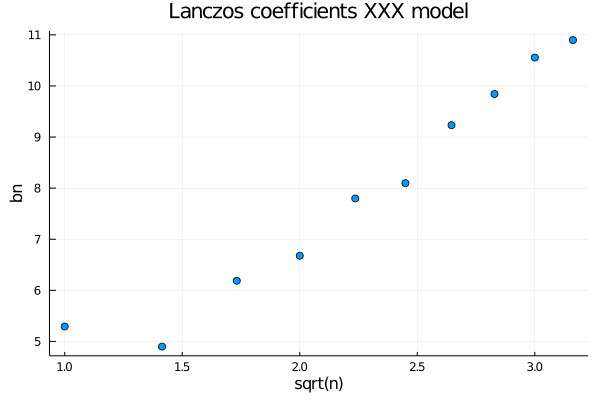

In [74]:
x = 1:length(VXXX)-1; y = VXXX[2:end]; # Lanczos Coefficients XXX model
plot(sqrt.(x), y,title = "Lanczos coefficients XXX model",seriestype = :scatter,label = false)
ylabel!("bn")
xlabel!("sqrt(n)")

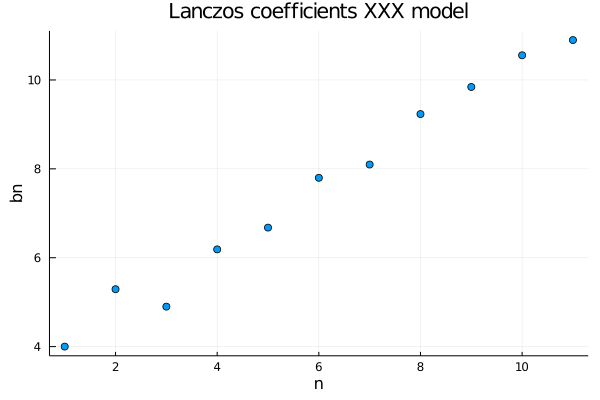

In [75]:
x = 1:length(VXXX); y = VXXX; # Lanczos Coefficients XXX model
plot(x, y,title = "Lanczos coefficients XXX model",seriestype = :scatter,label = false)
ylabel!("bn")
xlabel!("n")

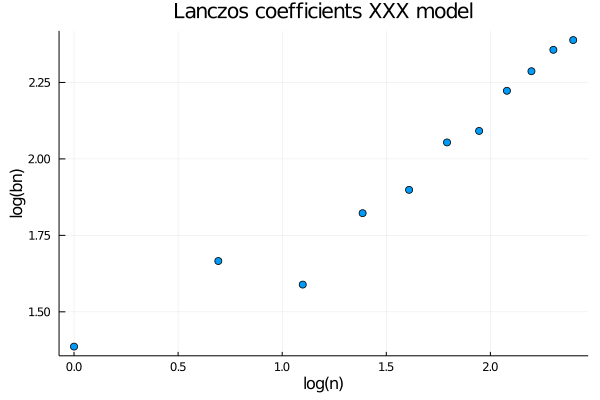

In [82]:
x = 1:length(VXXX); y = VXXX; # Lanczos Coefficients XXX model
plot(log.(x), log.(y),title = "Lanczos coefficients XXX model",seriestype = :scatter,label = false)
ylabel!("log(bn)")
xlabel!("log(n)")

In [78]:
log.(x)

11-element Array{Float64,1}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906
 1.6094379124341003
 1.791759469228055
 1.9459101490553132
 2.0794415416798357
 2.1972245773362196
 2.302585092994046
 2.3978952727983707

In [79]:
log.(y)

11-element Array{Float64,1}:
 1.3862943611198906
 1.666102255087602
 1.5890269151739727
 1.822538415727772
 1.898753773266062
 2.0538345883070397
 2.091448327275015
 2.22269931998616
 2.2866798591149164
 2.3566140294579454
 2.388554797595554

In [86]:
(log.(y)[11] - log.(y)[8])/(log.(x)[11] - log.(x)[8])

0.5208149925794373

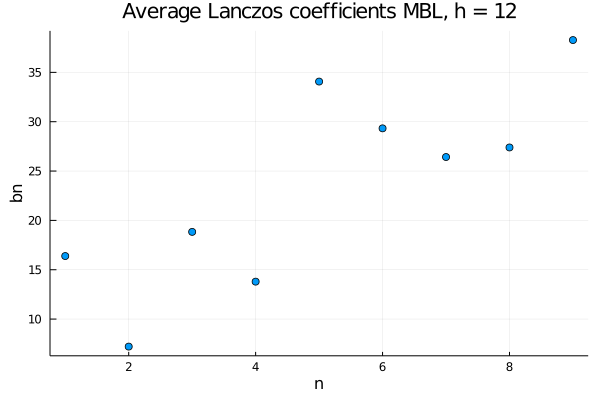

In [221]:
x = 1:length(meanA)-1; y = meanA[2:10]; # Lanczos Coefficients XXX model
plot(x, y,title = "Average Lanczos coefficients MBL, h = 12",seriestype = :scatter,label = false)
ylabel!("bn")
xlabel!("n")

In [212]:
meanA


10-element Array{Float64,1}:
  0.0
 16.38711035991349
  7.2115094667915915
 18.834703960175084
 13.79248623456991
 34.06682780708835
 29.326891141650616
 26.42130422323878
 27.38979573582435
 38.272969375689044